# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [14]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [15]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [16]:
app_train.dtypes.value_counts()


float64    65
int64      41
object     16
dtype: int64

In [17]:
#app_train.select_dtypes(include=['float64'])

In [18]:
#app_train.dtypes

In [19]:
df_types=pd.Series.to_frame(app_train.dtypes)
df_types
#df_types.isin(['int64'])

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
AMT_ANNUITY,float64


In [20]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = ['int64','float64']
#note for anna----------------
app_train.dtypes #show出所有欄位的資料格式。
#type(app_train.dtypes) #它是一個series的格式。
#app_train.dtypes.isin(dtype_select) #這個series的格式輸出去檢視它是否包含我們要的數值格式，它會輸出一個布林值。
#type(app_train.dtypes.isin(dtype_select))  #這個布林值的格式，也是一個series的格式。
#list(app_train.dtypes.isin(dtype_select))  #將這個布林值的格式轉成list
#print(app_train.columns)#將資料所有的欄位名稱show出來。
#type(app_train.columns) #這個格式是會pandas的index資料格式。
#app_train.columns[list(app_train.dtypes.isin(dtype_select))] #只show出布林值為true的index欄位名稱。
#note for anna-----------------

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))]) 
#print(numeric_columns)

#note for anna---------------------------------
#篩選出資料類別為數值的那些欄位，找出那些欄位的名稱，將定義為變數numeric_columns。定義為一個list。
#app_train[numeric_columns] #只show出那些我們關心的數值欄位。這個資料當然也是個dataframe。
#note for anna----------------------------------------

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
#note for anna---------------------------------------
#把這些數值欄位中，只有二個值的欄位去除，也就是只show出欄值類別超過2以上的欄位。
#app_train[numeric_columns]
#app_train[numeric_columns].apply(lambda x:len(x.unique())!=2)
#datafram如果做迭代，是迭代它的欄位。#這行程式會迭代每一欄位，算出它的唯一值個數之後，去判斷它是否不等於2，回傳布林值。
#type(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2))
#因為dataframe.columns([])這個函式，中間的參數要是list，因此將上述的布林值再轉成list，做欄位的篩選。
#這個判斷是否的回傳資料是series資料。
#lambda 是匿名函式。依後面x這個變數來做運算。
#numeric_columns 把最後的欄位列表印出來看看。
#len(numeric_columns) #最後篩選剩下的為73個欄位。
#note for anna------------------------------

#print("Numbers of remain columns" + str(len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    app_train[[col]].boxplot(vert=False)
    plt.show()

In [21]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
2.565
11700.0
3.2519161916159095e-06
1.0


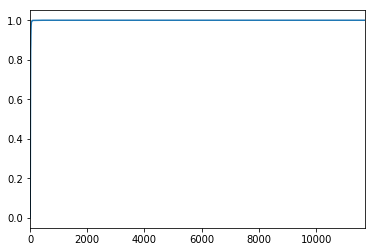

In [22]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
#ntoe for anna------------------------

#app_train['AMT_INCOME_TOTAL']


#note for anna-----------------------
#series的資料格式轉成list，函式為series的資料.tolist()
#app_train["AMT_INCOME_TOTAL"]這一個的資料截取為series,將這個依值排序, 函式為.sort_values。

cdf_s=app_train['AMT_INCOME_TOTAL'].sort_values()
cdf_l=cdf_s.tolist() #將series的格式轉為list
cdf_a=np.array(cdf_l) #將此數列轉為arrary
cdf_as=cdf_a/10000#將此arrya做計算
cdf=cdf_as.tolist()  #將array的格式轉為list
print(cdf[0])
print(cdf[len(cdf)-1])

#id=range(1,len(cdf)+1)
#for id/(len(cdf)) in range(1,len(cdf)+1):
id=list(range(1,len(cdf)+1))#產生index的數列list
id_a=np.array(id) #將此數列轉成array
ind_ac=id_a/len(cdf) #將此arrya做計算
index=ind_ac.tolist()#array的格式轉為list
print(index[0])
print(index[len(cdf)-1])
#type(index) #確認的確轉為list格式。

    



#plt.plot(x=index,y=cdf_l)

#plt.plot(list(cdf.index), cdf/cdf.max())
#plt.xlabel('Value')
#plt.ylabel('ECDF')
#plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
#plt.xlim(cdf[0],cdf[len(cdf)-1])
#plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
#plt.axis(cdf[0],cdf[len(cdf)],0,1)
#plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
#plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.plot(cdf,index)
plt.xlim(cdf[0],cdf[len(cdf)-1])
#plt.xlabel('Value (log-scale)')
#plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

In [23]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

SyntaxError: invalid syntax (<ipython-input-23-f4bf5c3f47dc>, line 8)

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


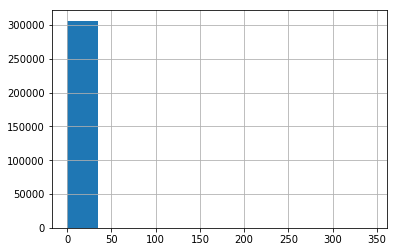

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [24]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here

cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
"""
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

In [25]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = 
loc_b = 

app_train.loc[loc_a, loc_b].hist()
plt.show()

SyntaxError: invalid syntax (<ipython-input-25-4510e3e564de>, line 6)